# Joint analysis of H0 MCMC analysis with added scatter

In [1]:
import os
import pandas as pd
import numpy as np
data_dir = '/cosma8/data/do012/dc-he4/analysis'



dict = {}
for lc in range(1728):
    lc00 = f'{lc:04d}'

    filename = f'{data_dir}/lc{lc00}/h0_mcmc_joint_scatter.csv'

    # check if file exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)

        # save to df
        if 'delta' not in list(dict.keys()):  # dict.keys() is of type dict_keys
            for key in df.keys():           # load all data
                dict[key] = df[key]

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.full(length, lc)
        else:
            for key in df.keys():           # load all data
                dict[key] = np.concatenate((dict[key], df[key]))

            length = len(df[key])           # register lightcone number
            dict['Lightcone'] = np.concatenate((dict['Lightcone'], np.full(length, lc)))

    else:
        print(lc00, 'h0_mcmc_joint_scatter.csv not found.')
        continue
    
data = pd.DataFrame(dict)
data

1181 h0_mcmc_joint_scatter.csv not found.
1215 h0_mcmc_joint_scatter.csv not found.


,relation1,relation2,delta,delta_err_lower,delta_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone
0,LX-T,YSZ-T,0.026584,0.014730,0.015931,-35.981386,74.339050,53.745589,-47.344279,27.559729,28.751950,134.400473,0
1,LX-T,YSZ-T,0.013635,0.009391,0.013001,-59.993987,123.621538,119.328557,-37.523303,36.582917,56.621010,196.212749,1
2,LX-T,YSZ-T,0.013253,0.009359,0.015082,-95.966432,79.825034,86.919035,10.808365,53.522157,47.997935,204.596356,2
3,LX-T,YSZ-T,0.014145,0.009763,0.015156,-59.962654,95.033698,90.718038,26.279786,55.691361,41.433391,192.217730,3
4,LX-T,YSZ-T,0.014206,0.009903,0.015747,107.997160,80.536458,83.504397,13.339656,51.862429,46.904264,234.903094,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,LX-T,YSZ-T,0.022107,0.014532,0.016098,-35.995391,88.281605,61.492074,41.518849,36.513559,31.325519,133.120151,1723
1722,LX-T,YSZ-T,0.011012,0.007709,0.012267,-24.003059,119.871704,117.846867,-21.034003,46.343570,62.066121,154.018911,1724
1723,LX-T,YSZ-T,0.015941,0.010986,0.014788,23.998871,96.421777,76.645201,-35.541032,36.889422,47.457686,159.660029,1725
1724,LX-T,YSZ-T,0.021920,0.013748,0.014875,-119.977430,121.951319,86.765492,54.088730,36.940206,24.846980,215.763670,1726


In [2]:
# Remove unfinished out of bound values
data = data[data['delta'] < 0.5]
# Delta H0
DeltaH0 = data['delta'].values * 2 * 100
data['DeltaH0'] = DeltaH0
# Significance
data['Significance'] = data['delta'] / data['delta_err_lower']

# Save to disk
data.to_csv('../data/analysis_all/h0_mc_joint_scatter_all.csv')

In [4]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/h0_mc_joint_scatter_all.csv')


In [5]:
print(len(data))

1726


## Contour
Read and plot

In [6]:
import pandas as pd
data = pd.read_csv('../data/analysis_all/h0_mc_joint_scatter_all.csv')

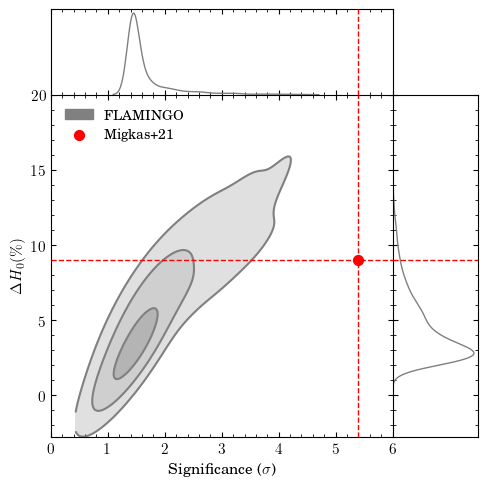

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('./nice.mplstyle')

contour_color = 'grey'

# Plot
g = sns.JointGrid(data,
                x='Significance', 
                y='DeltaH0',
                space=0,
                ratio=4,
                # marginal_ticks=True,
                height=5,
                # dpi=300
                xlim=(0, 6),
                ylim=(-2.8, 20),
                )

    
sns.kdeplot(data, 
            x='Significance',
            y='DeltaH0',
            fill=False, 
            levels=(0.011, 0.14, 0.61, 1.),
            bw_adjust=2.5,
            linewidths=1.5,
            zorder=2,
            ax=g.ax_joint,
            color=contour_color
            )
sns.kdeplot(data,
            x='Significance',
            y='DeltaH0',
            fill=True, 
            levels=(0.011, 0.14, 0.61, 1.), # 3 sigma is 0.011
            bw_adjust=2.5,
            zorder=1,
            alpha=0.5,
            ax=g.ax_joint,
            color=contour_color,
            )

# plot marginal plots
g.plot_marginals(sns.kdeplot,
                fill=False,
                color=contour_color,
                )

# M21 results
x_point = 5.4
y_point = 9.0
g.refline(x=x_point, y=y_point, linestyle='--', color='r', zorder=3)
line0 = g.ax_joint.scatter(x_point, y_point, marker='o', color='r', s=50, linewidths=1 ,label='Migkas+21', zorder=10)
#g.ax_joint.axhspan(ymin=8.7-3.1, ymax=8.7+3.1, color='tab:blue', alpha=0.2, zorder=0)

# x_point = 2.6
# y_point = 14
# g.refline(x=x_point, y=y_point, linestyle='--', color='r', zorder=3)
# line1 = g.ax_joint.scatter(x_point, y_point, marker='o', color='r', s=50, linewidths=1 ,label='$Y_\\mathrm{{SZ}}-T$', zorder=10)
# #g.ax_joint.axhspan(ymin=14.0-3.4, ymax=14.0+3.4, color='tab:orange', alpha=0.2, zorder=0)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# matplotlib doesn't detect the contour correctly, adding it manually
import matplotlib.patches as mpatches
contour = mpatches.Patch(color=contour_color, label='FLAMINGO')

# Fix the legend
g.ax_joint.legend(handles=[contour, line0], loc='upper left', fontsize=10)

# Set x, ylabel
g.ax_joint.set_ylabel('$\Delta H_0 (\%)$')
g.ax_joint.set_xlabel('Significance ($\sigma$)')

# plt.savefig('./to_paper/h0mc_hist_joint.pdf', bbox_inches='tight')

# Show the plot
plt.show()